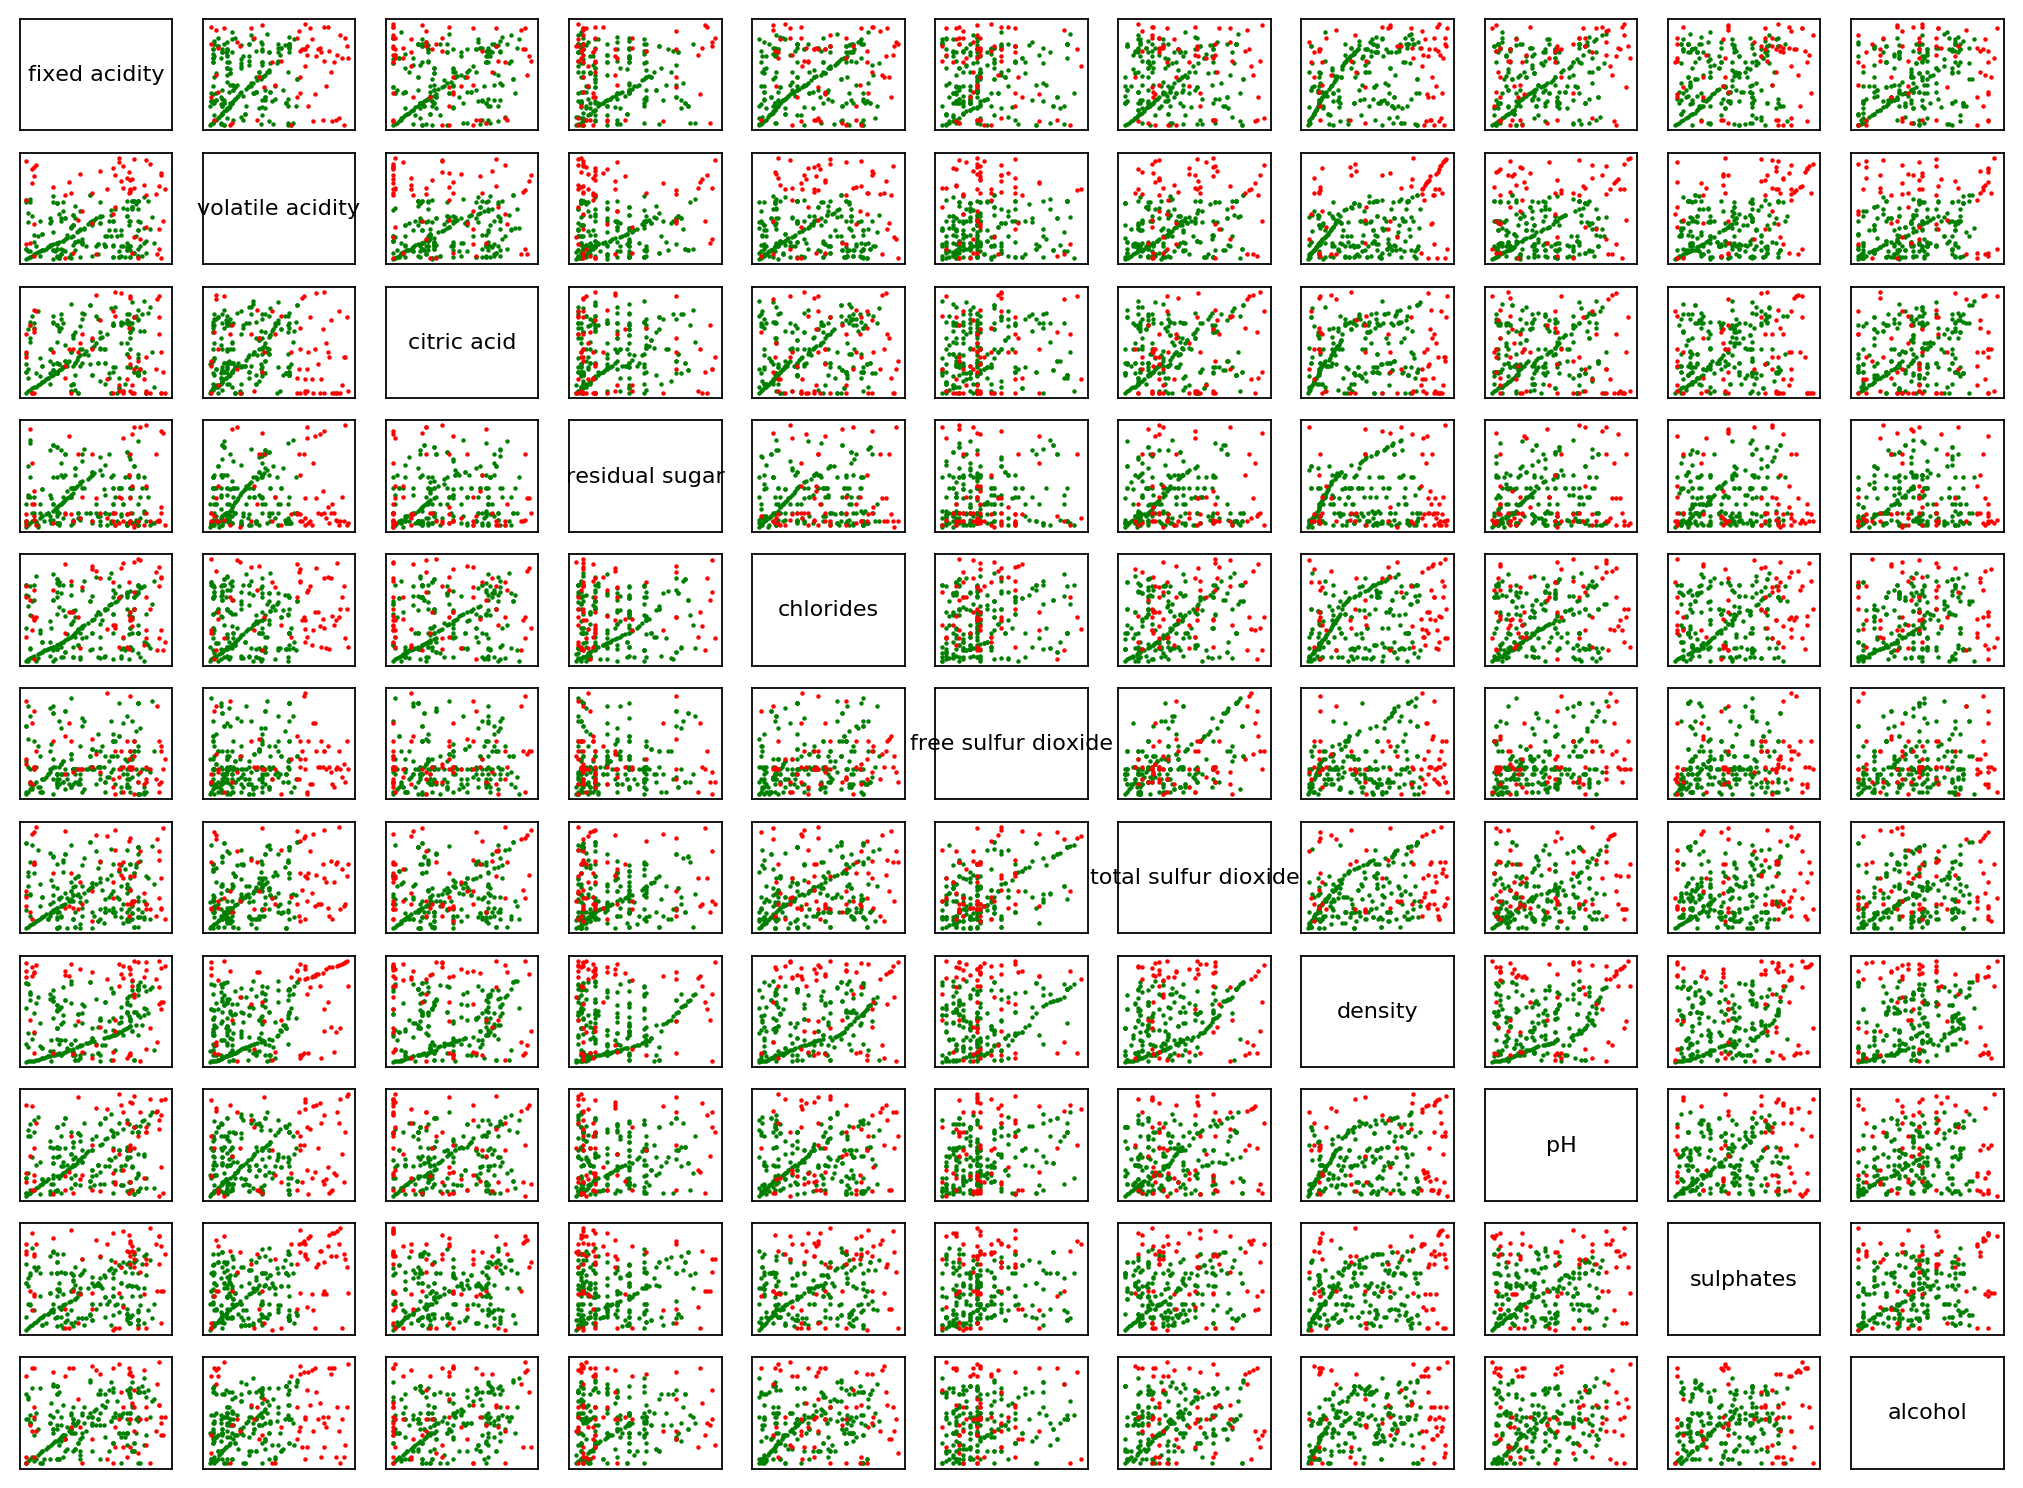

In [3]:
import csv
import matplotlib.pyplot as plt

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    try:
        with open(wine_data, newline='') as csvfile:
            data = list(csv.reader(csvfile, delimiter=';'))
    except FileNotFoundError as err:
        print(err.args)
        return 0


    legend = data.pop(0)
    size = len(legend) - 1

    good_list = []
    bad_list = []
    for i in data:
        if int(i[-1]) > good_threshold:
            good_list.append(i)
        if int(i[-1]) < bad_threshold:
            bad_list.append(i)

    good_list = list(zip(*good_list))
    bad_list = list(zip(*bad_list))

    index = 1
    plt.figure(num=None, figsize=(16, 12), dpi=160, facecolor='w', edgecolor='k')
    for i in range(size):
        for j in range(size):
            if i == j:
                ax = plt.subplot(size, size, index)
                plt.text(0.5, 0.5, legend[i], horizontalalignment='center',
                         verticalalignment='center', transform=ax.transAxes)
                plt.xticks([])
                plt.yticks([])
            else:
                ax = plt.subplot(size, size, index)
                if len(good_list) > 0:
                    ax.plot(good_list[j], good_list[i], 'o', c='g', ms=1)
                if len(bad_list) > 0:
                    ax.plot(bad_list[j], bad_list[i], 'o', c='r', ms=1)
                plt.xticks([])
                plt.yticks([])
            index += 1

    if save_plot:
        plt.savefig("scater_plot_vinisko.png")
    plt.show()

if __name__ == '__main__':
    plot_scatter_matrix("./resources/winequality-red.csv", 6, 5, save_plot=True)